# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
data_url = 'https://impfdashboard.de/static/data/germany_vaccinations_timeseries_v2.tsv'
data_lieferung_url = 'https://impfdashboard.de/static/data/germany_deliveries_timeseries_v2.tsv'

In [3]:
df = pd.read_csv(data_url, sep='\t')
df_lieferungen = pd.read_csv(data_lieferung_url, sep='\t')

In [4]:
df.columns

Index(['date', 'dosen_kumulativ', 'dosen_differenz_zum_vortag',
       'dosen_erst_differenz_zum_vortag', 'dosen_zweit_differenz_zum_vortag',
       'dosen_biontech_kumulativ', 'dosen_moderna_kumulativ',
       'dosen_astrazeneca_kumulativ', 'personen_erst_kumulativ',
       'personen_voll_kumulativ', 'impf_quote_erst', 'impf_quote_voll',
       'indikation_alter_dosen', 'indikation_beruf_dosen',
       'indikation_medizinisch_dosen', 'indikation_pflegeheim_dosen',
       'indikation_alter_erst', 'indikation_beruf_erst',
       'indikation_medizinisch_erst', 'indikation_pflegeheim_erst',
       'indikation_alter_voll', 'indikation_beruf_voll',
       'indikation_medizinisch_voll', 'indikation_pflegeheim_voll',
       'dosen_dim_kumulativ', 'dosen_kbv_kumulativ', 'dosen_johnson_kumulativ',
       'dosen_biontech_erst_kumulativ', 'dosen_biontech_zweit_kumulativ',
       'dosen_moderna_erst_kumulativ', 'dosen_moderna_zweit_kumulativ',
       'dosen_astrazeneca_erst_kumulativ', 'dosen_astr

In [5]:
df.date.iloc[-1]

'2021-06-06'

# Impfstofflieferungen

In [10]:
df_lieferungen_bund = df_lieferungen.groupby(["date", "impfstoff"], as_index=False).sum()

In [22]:
df_lieferungen_bund["date"] = pd.to_datetime(df_lieferungen_bund.date)
df_lieferungen_bund.set_index('date');

In [30]:
df_lieferungen_bund = df_lieferungen_bund.groupby(["impfstoff", pd.Grouper(key='date', freq='W-MON')]).sum().reset_index().sort_values('date')

In [35]:
df_lieferungen_bund.impfstoff.unique()

array(['comirnaty', 'moderna', 'astra', 'johnson'], dtype=object)

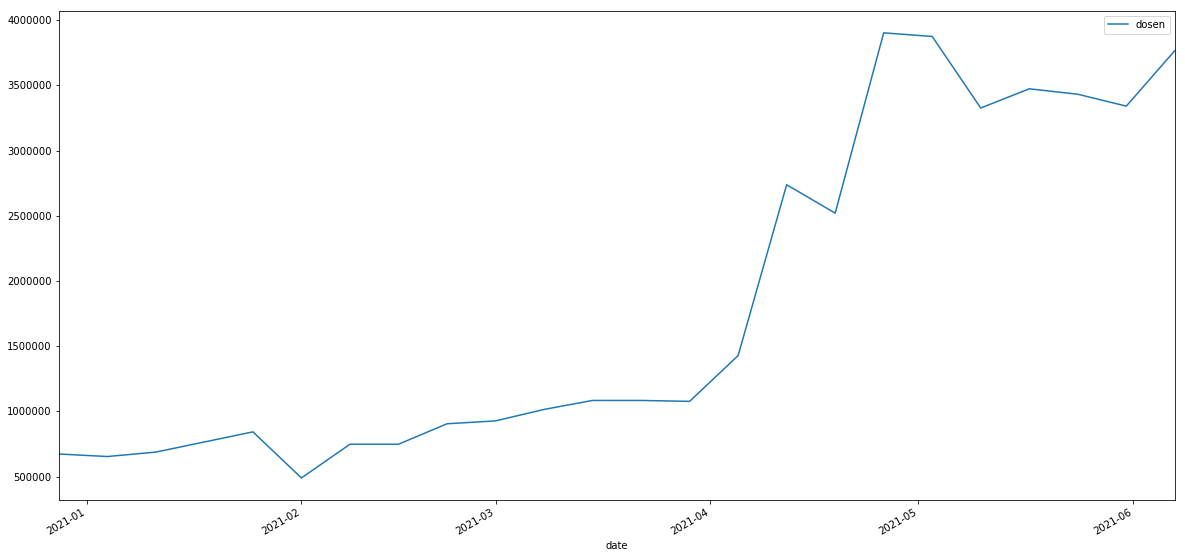

In [39]:
df_lieferungen_bund[df_lieferungen_bund.impfstoff == 'comirnaty'].plot('date')
plt.show()

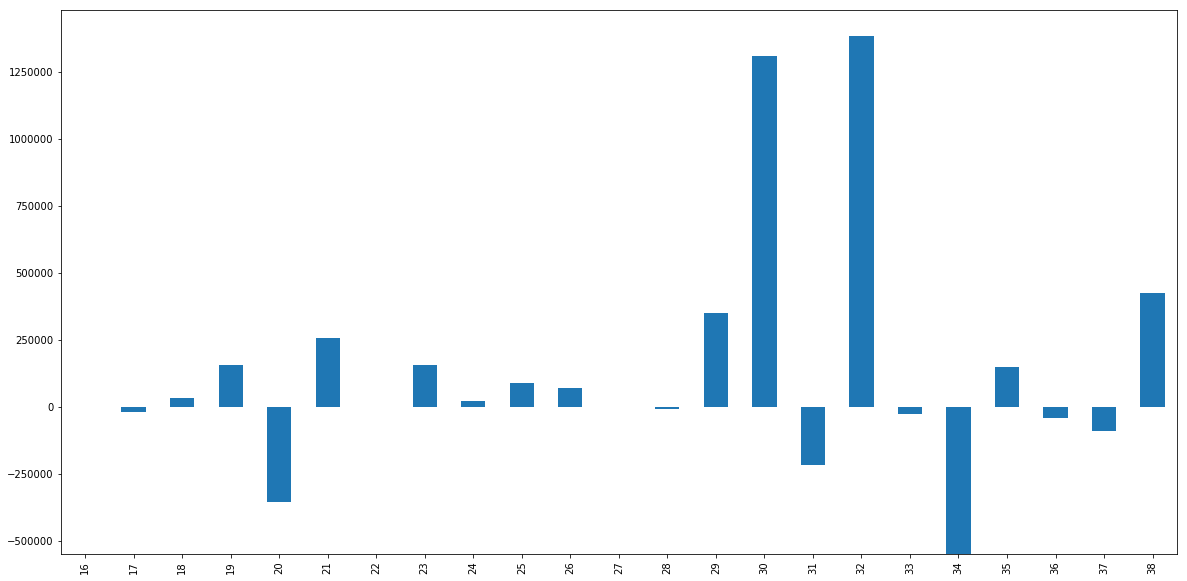

In [52]:
df_lieferungen_bund[df_lieferungen_bund.impfstoff == 'comirnaty'].dosen.diff().plot(kind='bar')
plt.show()

# Verimpfte Dosen

In [55]:
df["date"] = pd.to_datetime(df.date)
df.set_index('date');

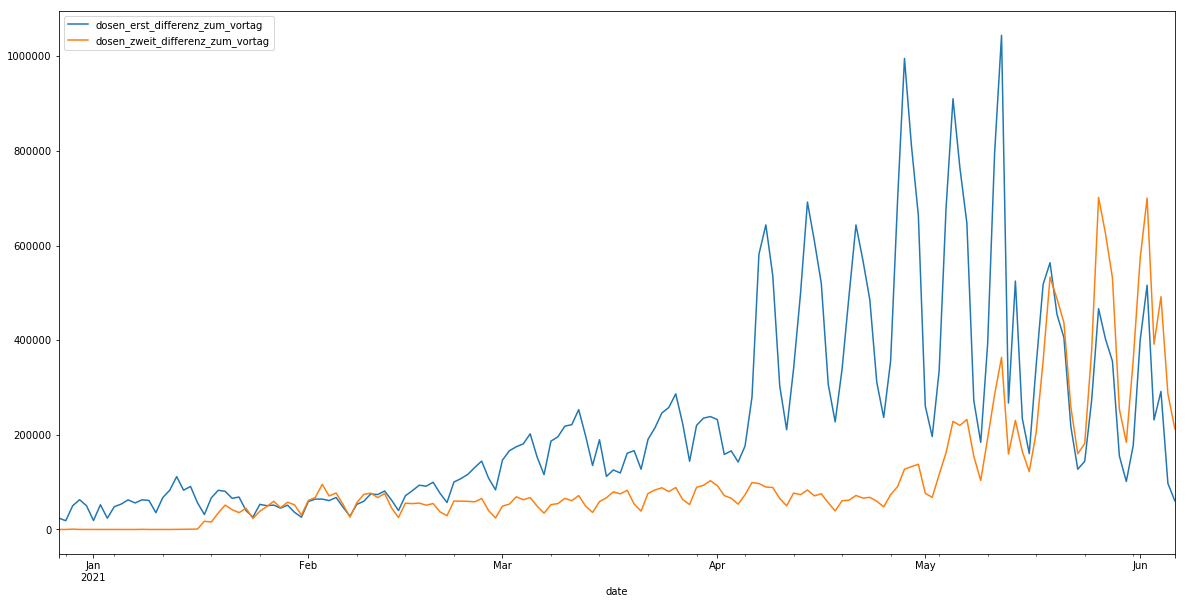

In [56]:
df.plot('date', ['dosen_erst_differenz_zum_vortag','dosen_zweit_differenz_zum_vortag'])
plt.show()

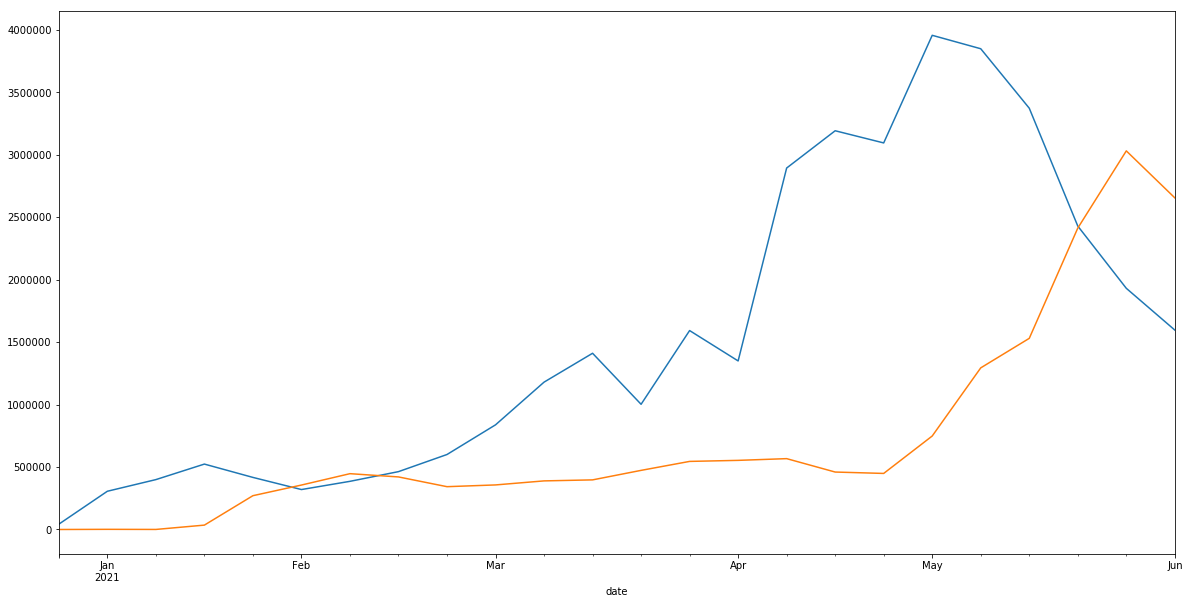

In [62]:
df.groupby(pd.Grouper(key='date', freq='W-MON')).sum()['dosen_erst_differenz_zum_vortag'].plot()
df.groupby(pd.Grouper(key='date', freq='W-MON')).sum()['dosen_zweit_differenz_zum_vortag'].plot()
plt.show()

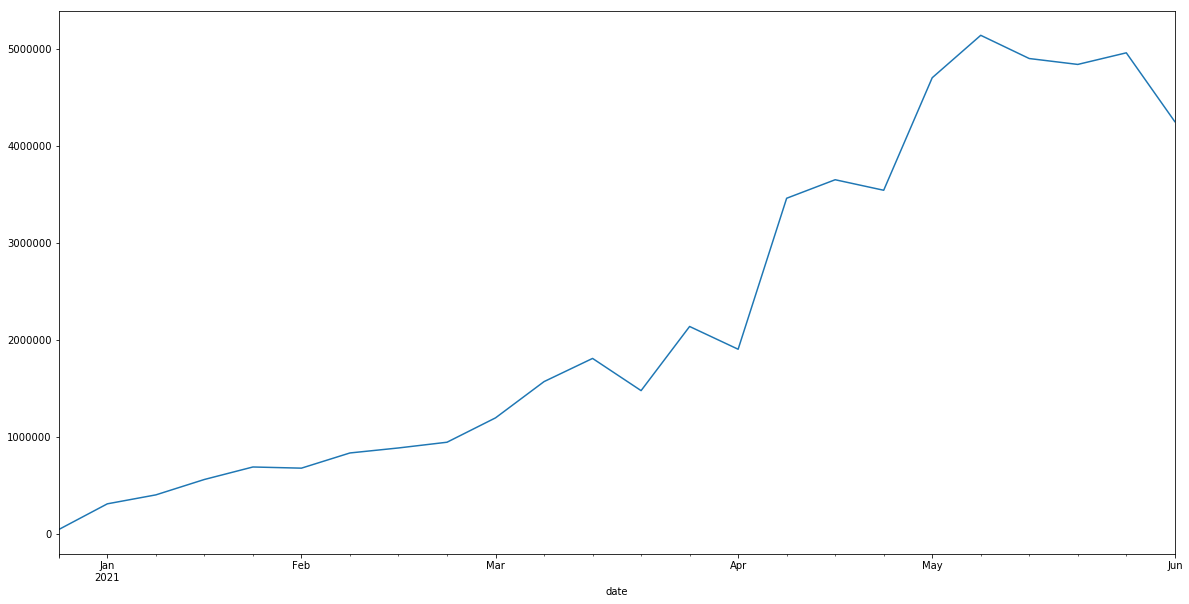

In [63]:
df.groupby(pd.Grouper(key='date', freq='W-MON')).sum()['dosen_differenz_zum_vortag'].plot()
plt.show()

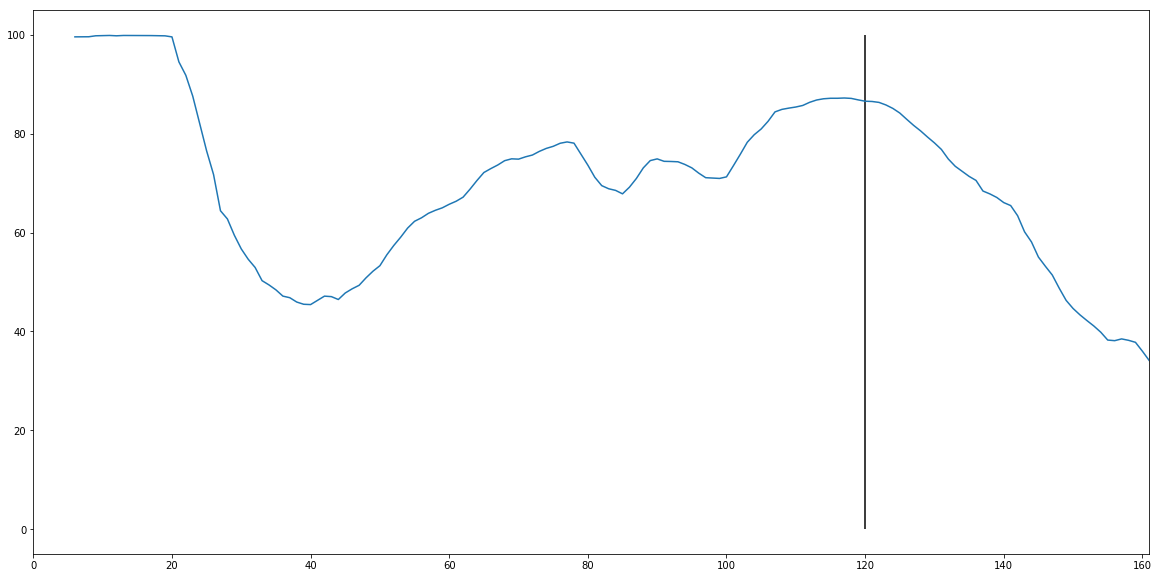

In [9]:
(100.0 * df.dosen_erst_differenz_zum_vortag / df.dosen_differenz_zum_vortag).rolling(7).mean().plot()
plt.vlines(len(df) - 6*7, 0, 100)
plt.show()

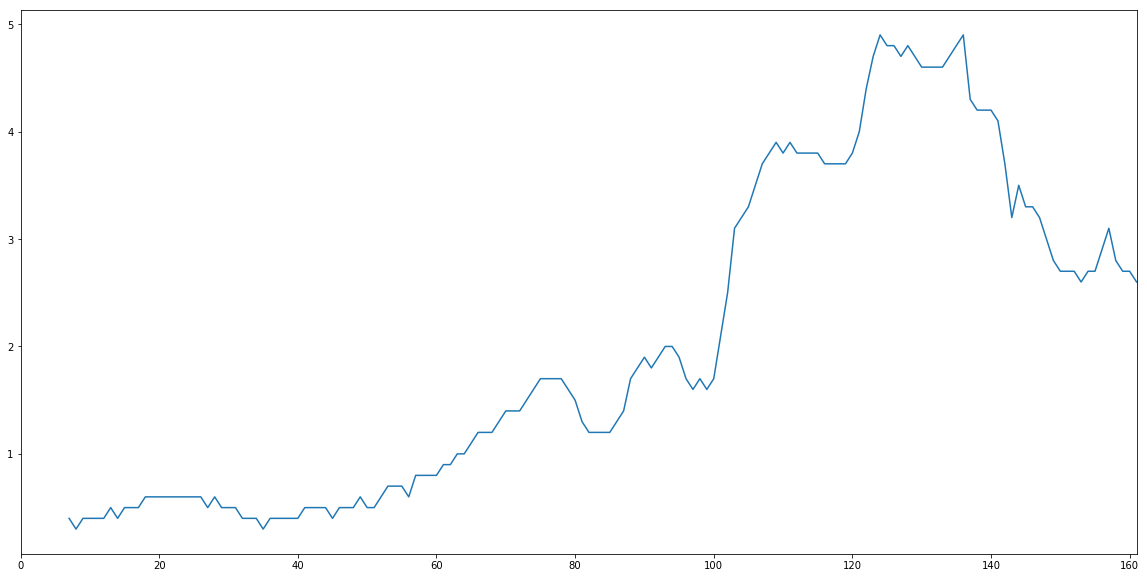

In [10]:
(df.impf_quote_erst.diff()*100.0).rolling(7).sum().plot()
plt.show()

In [11]:
(75.0 - df.impf_quote_erst.iloc[-1]*100.0)/((df.impf_quote_erst.diff()*100.0).rolling(7).sum().iloc[-1])

11.269230769230772

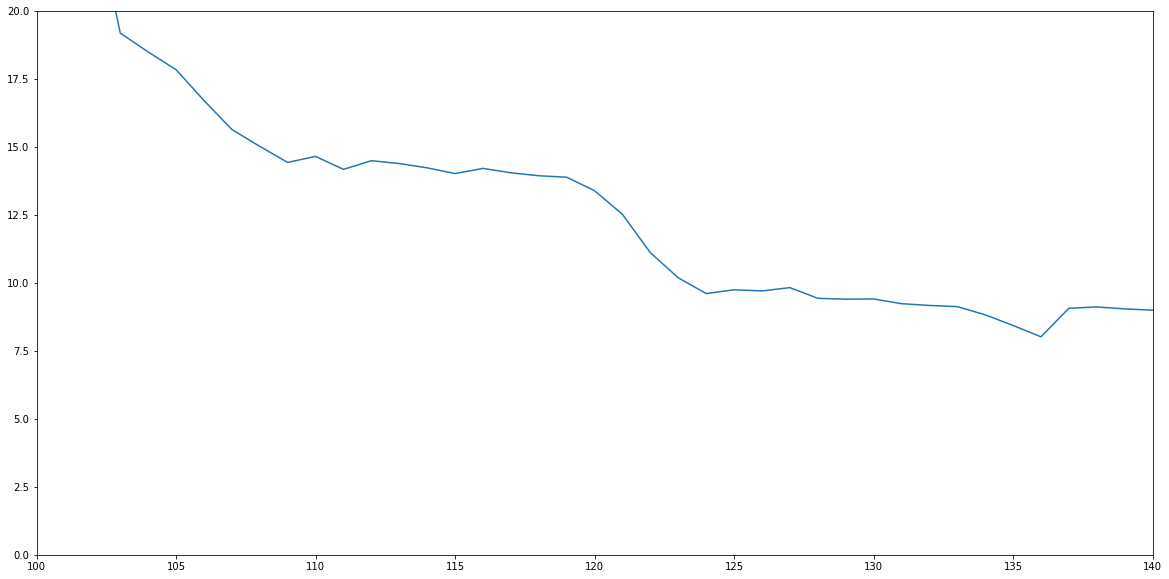

In [12]:
((75.0 - df.impf_quote_erst * 100.0)/((df.impf_quote_erst.diff()*100.0).rolling(7).sum())).plot()
plt.xlim(100,140)
plt.ylim(0,20)
plt.show()

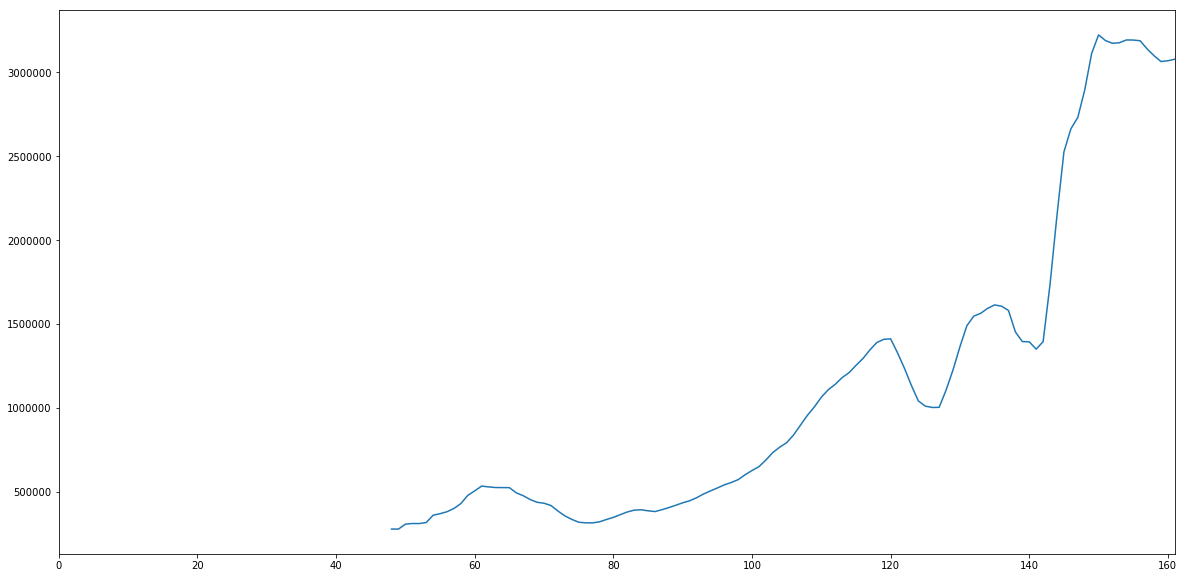

In [13]:
df.dosen_erst_differenz_zum_vortag.shift(6*7).rolling(7).sum().plot()
plt.show()